# Using Linear Regression to predict Bitcoin price and then the agent will utilize this prediction.

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [68]:
df = pd.read_csv("btc_6H_(2016-2018).csv")

In [69]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,MACD,MACD_Sig,MACD_status,3D_return,RSI,EMA_9,EMA_21,EMA_50,EMA_status,RSI_status,3D_return_norm,combiend_indicators
0,2016-10-31 00:00:00,697.10,698.50,683.60,696.36,1361.747671,9.393884e+05,692.355673,12.428315,13.431449,0.5,0.017683,10.544815,698.855021,688.507591,650.669833,0.5,0.0,0.45,0.5
1,2016-10-31 06:00:00,695.06,699.95,691.01,695.00,741.090902,5.151275e+05,695.743410,11.376187,13.020397,0.5,0.013149,2.918856,698.084017,689.097810,651.556436,0.5,0.5,0.45,0.5
2,2016-10-31 12:00:00,693.40,706.97,691.06,705.55,1731.215913,1.215454e+06,701.508506,11.263823,12.669082,0.5,0.026658,53.278689,699.577214,690.593463,652.636307,0.5,0.5,0.46,0.5
3,2016-10-31 18:00:00,705.55,706.00,695.79,697.01,821.838027,5.768631e+05,702.100042,10.366172,12.208500,0.5,0.016183,36.657401,699.063771,691.176785,653.523781,0.5,0.5,0.45,0.5
4,2016-11-01 00:00:00,697.04,710.00,695.38,708.50,551.013332,3.890027e+05,705.172417,10.461332,11.859066,0.5,0.012881,56.454918,700.951017,692.751623,654.623306,0.5,0.5,0.45,0.5


In [70]:
y = list(df.loc[1:,"Close"])

In [72]:
df = df.drop(df.index[len(df)-1])

In [73]:
df["Y"] = y
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,MACD,MACD_Sig,...,3D_return,RSI,EMA_9,EMA_21,EMA_50,EMA_status,RSI_status,3D_return_norm,combiend_indicators,Y
0,2016-10-31 00:00:00,697.10,698.50,683.60,696.36,1361.747671,9.393884e+05,692.355673,12.428315,13.431449,...,0.017683,10.544815,698.855021,688.507591,650.669833,0.5,0.0,0.45,0.5,695.00
1,2016-10-31 06:00:00,695.06,699.95,691.01,695.00,741.090902,5.151275e+05,695.743410,11.376187,13.020397,...,0.013149,2.918856,698.084017,689.097810,651.556436,0.5,0.5,0.45,0.5,705.55
2,2016-10-31 12:00:00,693.40,706.97,691.06,705.55,1731.215913,1.215454e+06,701.508506,11.263823,12.669082,...,0.026658,53.278689,699.577214,690.593463,652.636307,0.5,0.5,0.46,0.5,697.01
3,2016-10-31 18:00:00,705.55,706.00,695.79,697.01,821.838027,5.768631e+05,702.100042,10.366172,12.208500,...,0.016183,36.657401,699.063771,691.176785,653.523781,0.5,0.5,0.45,0.5,708.50
4,2016-11-01 00:00:00,697.04,710.00,695.38,708.50,551.013332,3.890027e+05,705.172417,10.461332,11.859066,...,0.012881,56.454918,700.951017,692.751623,654.623306,0.5,0.5,0.45,0.5,728.17


In [139]:
X = df[["Close","EMA_9","EMA_21","EMA_50"]]

In [140]:
Y = df[["Y"]]

In [141]:
model = LinearRegression().fit(X,Y)

In [142]:
test = pd.read_csv("btc_6H_(2020-2021).csv")

In [143]:
test_Y = test.loc[1:,"Close"]

In [144]:
test = test.drop(test.index[len(test)-1])

In [145]:
test["Y"] = list(test_Y)

In [147]:
X_test = test[["Close","EMA_9","EMA_21","EMA_50"]]

In [153]:
results =model.predict(X_test)

In [156]:
results = list(results)
transformed = []
for i in results:
    transformed.append(i[0])

transformed

[6200.331370232327,
 6374.609590137504,
 6358.834430081501,
 6402.7148039058375,
 6416.766602121544,
 6392.225908594953,
 6464.330682236291,
 6418.376629660008,
 6308.16377154246,
 6303.158539241104,
 6204.840688361745,
 6645.613932906744,
 6611.495937170981,
 6698.801570993402,
 7078.8635056671055,
 6799.5148821888215,
 6782.417136616653,
 7013.559135428408,
 6722.246629886159,
 6742.984489447332,
 6739.909682839788,
 6705.995712484122,
 6789.0011699352835,
 6877.810564665121,
 6787.624034098499,
 6776.238935593838,
 6806.87055391493,
 6775.067972873339,
 7003.730577416992,
 7110.744344874587,
 7223.414407229305,
 7347.954009935639,
 7283.4689893594095,
 7389.350465386449,
 7359.476909454495,
 7204.239733186943,
 7417.11425879747,
 7296.209209000687,
 7314.60197281104,
 7367.317037313748,
 7313.722084530554,
 7188.410653315463,
 7303.222894046804,
 7294.311402837857,
 6959.385778555257,
 6908.719311184025,
 6884.188021574562,
 6878.647167658341,
 6936.14945664832,
 6889.103043428137,


In [159]:
test["pred_Y"] = transformed
test.head()
del test["Pred_Y"]

<AxesSubplot:ylabel='Close'>

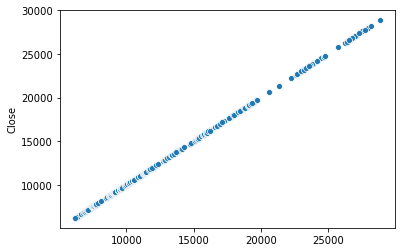

In [91]:
sns.scatterplot(results,test["Close"])

In [92]:
model.score(X_test,test["Y"])

0.9979197299421059

In [95]:
test["pred_Y"] = results

In [98]:
model = model.fit(X_test,test_Y)

In [99]:
model.coef_

array([ 1.04151632, -0.11094766,  0.08060511, -0.0052923 ])

In [107]:
results = model.predict(X)

In [101]:
results

array([ 652.78295847,  651.49491988,  662.43209276, ..., 3378.69391617,
       3400.34264512, 3537.59432432])

In [105]:
results = list(results)

In [109]:
model.score(X,df["Close"])

0.9999433235536284

In [103]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,MACD,MACD_Sig,...,RSI,EMA_9,EMA_21,EMA_50,EMA_status,RSI_status,3D_return_norm,combiend_indicators,Y,pred_Y
0,2016-10-31 00:00:00,697.10,698.50,683.60,696.36,1361.747671,9.393884e+05,692.355673,12.428315,13.431449,...,10.544815,698.855021,688.507591,650.669833,0.5,0.0,0.45,0.5,695.00,652.782958
1,2016-10-31 06:00:00,695.06,699.95,691.01,695.00,741.090902,5.151275e+05,695.743410,11.376187,13.020397,...,2.918856,698.084017,689.097810,651.556436,0.5,0.5,0.45,0.5,705.55,651.494920
2,2016-10-31 12:00:00,693.40,706.97,691.06,705.55,1731.215913,1.215454e+06,701.508506,11.263823,12.669082,...,53.278689,699.577214,690.593463,652.636307,0.5,0.5,0.46,0.5,697.01,662.432093
3,2016-10-31 18:00:00,705.55,706.00,695.79,697.01,821.838027,5.768631e+05,702.100042,10.366172,12.208500,...,36.657401,699.063771,691.176785,653.523781,0.5,0.5,0.45,0.5,708.50,653.636831
4,2016-11-01 00:00:00,697.04,710.00,695.38,708.50,551.013332,3.890027e+05,705.172417,10.461332,11.859066,...,56.454918,700.951017,692.751623,654.623306,0.5,0.5,0.45,0.5,728.17,665.515589


In [119]:
def pred_status(X,Y):
    status = None
    if Y>X:
        status = 1.0
    else:
        status = 0.0
    return status

In [160]:
status = []
for x,y in zip(test["Close"],test["pred_Y"]):
    status.append(pred_status(x,y))

test["Pred_status"] = status

In [161]:
test.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,MACD,MACD_Sig,...,EMA_9,EMA_21,EMA_50,EMA_status,RSI_status,3D_return_norm,combiend_indicators,Y,pred_Y,Pred_status
0,2020-03-30 00:00:00,5878.47,6251.43,5856.00,6204.85,2059.802518,1.248292e+07,6005.395913,-72.074599,-9.939001,...,6173.631155,6281.863764,6736.199981,0.5,0.5,0.40,0.5,6381.07,6200.331370,0.0
1,2020-03-30 06:00:00,6215.41,6433.98,6182.19,6381.07,5220.174376,3.279053e+07,6281.814413,-53.677019,-18.686605,...,6215.118924,6290.882513,6729.097382,0.5,0.5,0.42,0.5,6364.06,6374.609590,0.0
2,2020-03-30 12:00:00,6384.72,6457.00,6267.35,6364.06,4123.736083,2.616454e+07,6352.836129,-40.008179,-22.950920,...,6244.907139,6297.535012,6721.796634,0.5,0.5,0.42,0.5,6407.77,6358.834430,0.0
3,2020-03-30 18:00:00,6367.66,6630.00,6334.91,6407.77,3570.731186,2.315176e+07,6451.820666,-25.356203,-23.431976,...,6277.479711,6307.556374,6715.516101,0.5,0.5,0.45,0.5,6421.23,6402.714804,0.0
4,2020-03-31 00:00:00,6408.95,6527.24,6381.82,6421.23,1123.293410,7.250760e+06,6454.742399,-12.514043,-21.248390,...,6306.229769,6317.890340,6709.630379,0.5,0.5,0.47,0.5,6395.70,6416.766602,0.0


In [163]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,MACD,MACD_Sig,...,EMA_9,EMA_21,EMA_50,EMA_status,RSI_status,3D_return_norm,combiend_indicators,Y,pred_Y,Pred_status
0,2016-10-31 00:00:00,697.10,698.50,683.60,696.36,1361.747671,9.393884e+05,692.355673,12.428315,13.431449,...,698.855021,688.507591,650.669833,0.5,0.0,0.45,0.5,695.00,652.782958,0.0
1,2016-10-31 06:00:00,695.06,699.95,691.01,695.00,741.090902,5.151275e+05,695.743410,11.376187,13.020397,...,698.084017,689.097810,651.556436,0.5,0.5,0.45,0.5,705.55,651.494920,0.0
2,2016-10-31 12:00:00,693.40,706.97,691.06,705.55,1731.215913,1.215454e+06,701.508506,11.263823,12.669082,...,699.577214,690.593463,652.636307,0.5,0.5,0.46,0.5,697.01,662.432093,0.0
3,2016-10-31 18:00:00,705.55,706.00,695.79,697.01,821.838027,5.768631e+05,702.100042,10.366172,12.208500,...,699.063771,691.176785,653.523781,0.5,0.5,0.45,0.5,708.50,653.636831,0.0
4,2016-11-01 00:00:00,697.04,710.00,695.38,708.50,551.013332,3.890027e+05,705.172417,10.461332,11.859066,...,700.951017,692.751623,654.623306,0.5,0.5,0.45,0.5,728.17,665.515589,0.0


In [167]:
df.to_csv("T4_train.csv",index=False)
test.to_csv("T4_test.csv",index=False)